<a href="https://www.kaggle.com/code/swapanroy/predict-length-of-stay-w-gradient-boosting-algo?scriptVersionId=100292886" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Libraries needed for data Analysis 
import pandas as pd
import numpy as np

# Libraries needed for models and visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries needed for pre-processing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# models
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix


#Validation 
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Library to ignore warnings 
import warnings; warnings.filterwarnings('ignore')


### Implementation  
Below implementation cover's: 

**AdaBoost** - Adaptive Boost, is a statistical classification meta-algorithm refers to a particular method of training a boosted classifier.


**CATBoost** - Provides a gradient boosting framework which among other features attempts to solve for Categorical features using a permutation driven alternative compared to the classical algorithm.

### Before starting review these links: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html 

https://github.com/catboost/catboost



# Read Data

In [2]:
df_train=pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/train_data.csv',sep=',')
df_train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


# Review Data

In [3]:

# Data dimensionality (rows, colums)
print(df_train.shape)
# Data distributing
df_train.info()


(318438, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient         

In [4]:
df_train_dic = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/train_data_dictionary.csv', sep =',')
df_train_dic

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [5]:
df_test = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/test_data.csv', sep =',')
df_test.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [6]:
for feature in df_train.columns: 
    if df_train[feature].dtype == object:
        print('\nFeature:',feature)
        print(pd.Categorical(df_train[feature].unique()))


Feature: Hospital_type_code
['c', 'e', 'b', 'a', 'f', 'd', 'g']
Categories (7, object): ['a', 'b', 'c', 'd', 'e', 'f', 'g']

Feature: Hospital_region_code
['Z', 'X', 'Y']
Categories (3, object): ['X', 'Y', 'Z']

Feature: Department
['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease', 'surgery']
Categories (5, object): ['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy', 'surgery']

Feature: Ward_Type
['R', 'S', 'Q', 'P', 'T', 'U']
Categories (6, object): ['P', 'Q', 'R', 'S', 'T', 'U']

Feature: Ward_Facility_Code
['F', 'E', 'D', 'B', 'A', 'C']
Categories (6, object): ['A', 'B', 'C', 'D', 'E', 'F']

Feature: Type of Admission
['Emergency', 'Trauma', 'Urgent']
Categories (3, object): ['Emergency', 'Trauma', 'Urgent']

Feature: Severity of Illness
['Extreme', 'Moderate', 'Minor']
Categories (3, object): ['Extreme', 'Minor', 'Moderate']

Feature: Age
['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30', '11-20', '0-10', '91-100']
Categories (10, objec

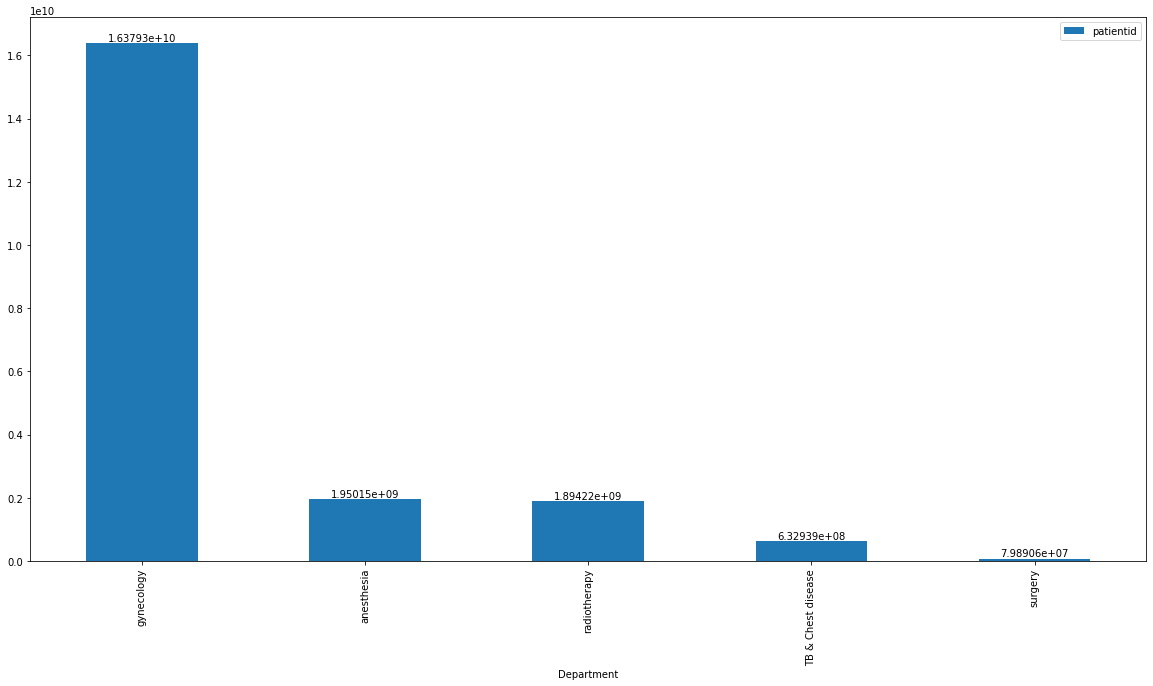

In [7]:
x = df_train.groupby(by=['Department'])['patientid'].sum().reset_index().sort_values(['patientid'],
                    ascending=False).head(10).plot(x='Department',y='patientid',kind='bar', figsize=(20,10))

for i in x.containers:
 x.bar_label(i,)


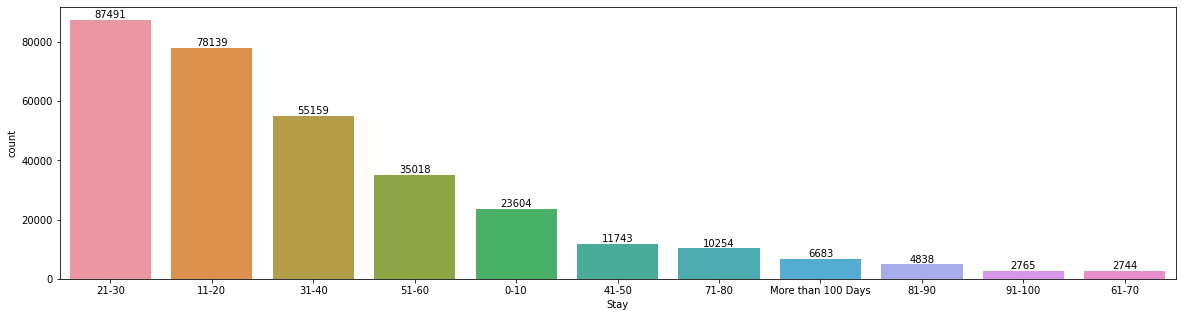

In [8]:
plt.figure(figsize=(20,5))
x = sns.countplot(df_train['Stay'], order = df_train['Stay'].value_counts().index)
for i in x.containers:
 x.bar_label(i,)

In [9]:
df_x = df_train.groupby(by=['Department','Stay'])
df_x['Stay'].value_counts()

Department          Stay                Stay              
TB & Chest disease  0-10                0-10                    791
                    11-20               11-20                  2379
                    21-30               21-30                  2618
                    31-40               31-40                  1753
                    41-50               41-50                   300
                    51-60               51-60                  1047
                    61-70               61-70                    76
                    71-80               71-80                   294
                    81-90               81-90                   140
                    91-100              91-100                   64
                    More than 100 Days  More than 100 Days      124
anesthesia          0-10                0-10                   1519
                    11-20               11-20                  8823
                    21-30               21-30            

In [10]:
# Sample testing 
df_patient_31397 = df_train[df_train['patientid'] == 31397]
df_patient_31397


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


There are multiple entries for a patient ID with different department and length of stay. Date will be a relevant parameter here to understand timeline of events.

# Check for nulls

In [11]:
df_train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

# Check for dupes

In [12]:
print('Total duplicate values in the dataset : ',df_train.duplicated().sum())

Total duplicate values in the dataset :  0


Insights:

Categorical features which need to be converted from object to Int:
* Department
* Ward_Type
* Admission
* Illness

Bins (range) which need to be encoded:
* Age
* Stay (Target)

Columns that are not needed
* Hospital_region_code
* Bed Grade
* City_Code_Patient
* patientid



Note: Test does not have Stay column; which needs to be predicted

In [13]:
df_train = df_train.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'],axis =1)
df_test = df_test.drop(['Hospital_region_code', 'Bed Grade', 'patientid', 'City_Code_Patient'], axis = 1)


Merging Train and Test on multi dimention to pre-process data.

In [14]:
df_merge = [df_train, df_test]
df_merge[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,3,radiotherapy,R,F,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,2,radiotherapy,S,F,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,2,anesthesia,S,E,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,2,radiotherapy,R,D,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,2,radiotherapy,S,D,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,3,radiotherapy,Q,F,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,2,anesthesia,Q,E,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,3,gynecology,R,F,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,3,anesthesia,Q,D,Trauma,Minor,5,11-20,3761.0,11-20


In [15]:
for df in df_merge:
    label = LabelEncoder()
    df['Department'] = label.fit_transform(df['Department'])
    df['Hospital_type_code'] = label.fit_transform(df['Hospital_type_code'])
    df['Ward_Facility_Code'] = label.fit_transform(df['Ward_Facility_Code'])
    df['Ward_Type'] = label.fit_transform(df['Ward_Type'])
    df['Type of Admission'] = label.fit_transform(df['Type of Admission'])
    df['Severity of Illness'] = label.fit_transform(df['Severity of Illness'])
df_merge

[        case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
 0             1              8                   2                   3   
 1             2              2                   2                   5   
 2             3             10                   4                   1   
 3             4             26                   1                   2   
 4             5             26                   1                   2   
 ...         ...            ...                 ...                 ...   
 318433   318434              6                   0                   6   
 318434   318435             24                   0                   1   
 318435   318436              7                   0                   4   
 318436   318437             11                   1                   2   
 318437   318438             19                   0                   7   
 
         Available Extra Rooms in Hospital  Department  Ward_Type  \
 0                           

# Binning 

In [16]:
df_merge[0].Age.unique()

df_merge[0].Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [17]:
age_value = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
stay_value = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

Replacing Age and Stay with Int values

In [18]:

df_merge[0]['Age'] = df_merge[0]['Age'].replace(age_value.keys(), age_value.values())
df_merge[0]['Stay'] = df_merge[0]['Stay'].replace(stay_value.keys(), stay_value.values())
df_merge[1]['Age'] = df_merge[1]['Age'].replace(age_value.keys(), age_value.values())


In [19]:

print(df_merge[0].shape)
print(df_merge[1].shape)

(318438, 14)
(137057, 13)


In [20]:
print(df_merge)

[        case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
0             1              8                   2                   3   
1             2              2                   2                   5   
2             3             10                   4                   1   
3             4             26                   1                   2   
4             5             26                   1                   2   
...         ...            ...                 ...                 ...   
318433   318434              6                   0                   6   
318434   318435             24                   0                   1   
318435   318436              7                   0                   4   
318436   318437             11                   1                   2   
318437   318438             19                   0                   7   

        Available Extra Rooms in Hospital  Department  Ward_Type  \
0                                       3 

Applying Standard scaling to get optimize results

In [21]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital','Severity of Illness', 'Visitors with Patient']
columns_list

['Type of Admission',
 'Available Extra Rooms in Hospital',
 'Severity of Illness',
 'Visitors with Patient']

In [22]:
sc= StandardScaler()

for df in df_merge:
    df[columns_list]= sc.fit_transform(df[columns_list].values)
df_merge[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,-0.169177,3,2,5,-1.136165,-1.788287,-0.727923,5,4911.0,0
1,2,2,2,5,-1.025217,3,3,5,0.315306,-1.788287,-0.727923,5,5954.0,4
2,3,10,4,1,-1.025217,1,3,4,0.315306,-1.788287,-0.727923,5,4745.0,3
3,4,26,1,2,-1.025217,3,2,3,0.315306,-1.788287,-0.727923,5,7272.0,4
4,5,26,1,2,-1.025217,3,3,3,0.315306,-1.788287,-0.727923,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,-0.169177,3,1,5,-1.136165,0.814607,-0.161049,4,4144.0,1
318434,318435,24,0,1,-1.025217,1,1,4,1.766778,0.814607,0.405826,8,6699.0,3
318435,318436,7,0,4,-0.169177,2,2,5,-1.136165,-0.486840,-0.161049,7,4235.0,1
318436,318437,11,1,2,-0.169177,1,1,3,0.315306,-0.486840,0.972701,1,3761.0,1


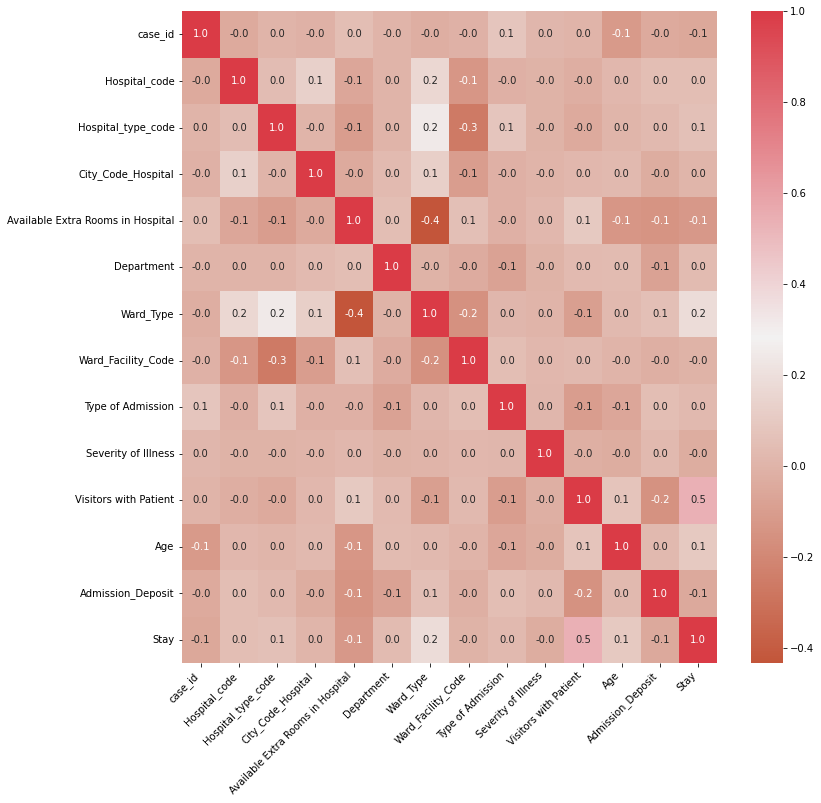

In [23]:

correlations = df_merge[0].corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
# Generate Color Map
colormap = sns.diverging_palette(20, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".1f")
ax.set_xticklabels(
    df_merge[0],
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(df_merge[0]);
plt.show()

In [24]:
df_train_new = df_merge[0]
df_test_new = df_merge[1]

y = df_train_new['Stay']
X = df_train_new.drop(columns=["Stay"])




In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of error classified instances are adjusted.

In [26]:
ada_classifier = AdaBoostClassifier(n_estimators=5)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

# Cross-validation
scores = cross_val_score(ada_classifier,X_test,y_test, cv=12)
print('Accuracy score',round(scores.mean() * 100,2))
print('Confusion Matrix\n',confusion_matrix(y_test, pred_ada))

Accuracy score 33.8
Confusion Matrix
 [[   38  1483  3151     0     0    17     0     0     0     0     0]
 [   95  4661  9763     0     0  1042     0     0     0     0     0]
 [   83  5250 11859     0     0   411     0     0     0     0     0]
 [   24  2530  4543     0     0  3884     0     0     0     0     0]
 [   17   680  1357     0     0   303     0     0     0     0     0]
 [    4  1085  1095     0     0  4944     0     0     0     0     0]
 [    0   121   269     0     0   164     0     0     0     0     0]
 [    1   328   207     0     0  1495     0     0     0     0     0]
 [    0    33    69     0     0   839     0     0     0     0     0]
 [    0    90    50     0     0   412     0     0     0     0     0]
 [    0    78   114     0     0  1099     0     0     0     0     0]]


#### AdaBoost's accuracy score is low.

# CatBoost - Gradient Algorithm 

Gradient boosting algorithm works by building simpler (weak) prediction models sequentially where each model tries to predict the error left over by the previous model. 
It find uses in search, recommendation systems, personal assistant, self-driving cars, weather prediction.


### Important Parameters of CatBoost Model 
* **iterations** - It accepts integer specifying the number of trees to train. The default is 1000.
* **learning_rate** - It specifies the learning rate during the training process. The default is 0.03.
* **l2_leaf_reg** - It accepts float specifying coefficient of L2 regularization of a loss function. The default value is 3.
* **loss_function** - It accepts string specifying metric used during training. The gradient boosting algorithm will try to minimize/maximize loss function output depending on the situation.
* **eval_metric** - It accepts string specifying metric to evaluate on evaluation set given during training. It has the same options as that of loss_function.

In [27]:

eval_dataset = Pool(X_test,
                    y_test)

# Define Gradient Boosting Classifier with hyperparameters

model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.3,
                           depth=10,
                           l2_leaf_reg = 3,
                           random_strength =0,
                           loss_function='MultiClass',
                           eval_metric='MultiClass')

0:	learn: 1.9411437	test: 1.9430596	best: 1.9430596 (0)	total: 998ms	remaining: 16m 36s
1:	learn: 1.7916964	test: 1.7960389	best: 1.7960389 (1)	total: 1.87s	remaining: 15m 33s
2:	learn: 1.7047421	test: 1.7104753	best: 1.7104753 (2)	total: 2.7s	remaining: 14m 58s
3:	learn: 1.6539964	test: 1.6613540	best: 1.6613540 (3)	total: 3.55s	remaining: 14m 44s
4:	learn: 1.6182168	test: 1.6276910	best: 1.6276910 (4)	total: 4.4s	remaining: 14m 35s
5:	learn: 1.5927828	test: 1.6036789	best: 1.6036789 (5)	total: 5.24s	remaining: 14m 28s
6:	learn: 1.5746661	test: 1.5884679	best: 1.5884679 (6)	total: 6.09s	remaining: 14m 24s
7:	learn: 1.5615615	test: 1.5774777	best: 1.5774777 (7)	total: 6.96s	remaining: 14m 23s
8:	learn: 1.5521814	test: 1.5694098	best: 1.5694098 (8)	total: 7.8s	remaining: 14m 19s
9:	learn: 1.5444404	test: 1.5638373	best: 1.5638373 (9)	total: 8.66s	remaining: 14m 17s
10:	learn: 1.5380335	test: 1.5590432	best: 1.5590432 (10)	total: 9.52s	remaining: 14m 15s
11:	learn: 1.5344944	test: 1.5570

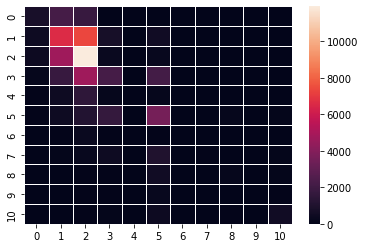

catboost Acc :  0.7392269653850035


In [28]:
model.fit(X_train,
          y_train,
          eval_set=eval_dataset,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

#### Accuracy score of CATboost is better than Adaboost

In [29]:
print(cm)

pred_cat = model.predict(
                 eval_dataset, 
                 verbose=True)


accuracy_score(y_test, pred_cat)

[[7.4600e+02 2.1500e+03 1.7330e+03 3.8000e+01 4.0000e+00 1.6000e+01
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [4.3400e+02 6.5790e+03 7.3100e+03 7.0600e+02 5.0000e+00 5.1800e+02
  0.0000e+00 7.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00]
 [3.9500e+02 4.7020e+03 1.1911e+04 2.9700e+02 5.0000e+00 2.5300e+02
  0.0000e+00 5.0000e+00 1.8000e+01 0.0000e+00 1.7000e+01]
 [1.6600e+02 1.7300e+03 4.7010e+03 2.1770e+03 2.0000e+00 2.1280e+03
  0.0000e+00 1.8000e+01 1.8000e+01 2.0000e+00 3.9000e+01]
 [7.5000e+01 4.2900e+02 1.4770e+03 1.8000e+02 5.0000e+00 1.5200e+02
  0.0000e+00 6.0000e+00 9.0000e+00 0.0000e+00 2.4000e+01]
 [8.5000e+01 4.4200e+02 1.1030e+03 1.6490e+03 6.0000e+00 3.5460e+03
  0.0000e+00 3.7000e+01 1.6200e+02 1.0000e+00 9.7000e+01]
 [1.7000e+01 6.9000e+01 2.8000e+02 6.5000e+01 3.0000e+00 8.7000e+01
  0.0000e+00 7.0000e+00 1.0000e+01 0.0000e+00 1.6000e+01]
 [2.8000e+01 1.0000e+02 2.4400e+02 4.2500e+02 2.0000e+00 9.9900e+02
  0.0000e+00 5.6000e+01 4.1000e+01 0.0000e+00 1.36

0.40367102122848886

In [30]:
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,2,3,-0.165503,2,3,0,-1.135402,0.814234,-0.722758,7,3095.0
1,318440,29,0,4,-1.024428,2,3,5,0.314484,0.814234,0.402568,7,4018.0
2,318441,26,1,2,-0.165503,2,1,3,-1.135402,0.814234,-0.160095,7,4492.0
3,318442,6,0,6,-0.165503,2,1,5,0.314484,0.814234,-0.160095,7,4173.0
4,318443,28,1,11,-1.024428,2,2,5,0.314484,0.814234,0.402568,7,4161.0


In [31]:
eval_dt = Pool(df_test)
eval_dt

In [32]:
preds_class = model.predict(eval_dt)
preds_class.shape
preds_class

array([[0],
       [5],
       [2],
       ...,
       [2],
       [1],
       [3]])

# Submit 

In [33]:

df_sample = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/sample_sub.csv', sep = ',')
df_sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [34]:
df_test


df_sample["Stay"] = preds_class
swap_value_Stay = dict([(value, key) for key, value in stay_value.items()])
df_sample["Stay"].replace(swap_value_Stay, inplace=True)
df_sample.head()









,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
